# Introduction

First we import the data

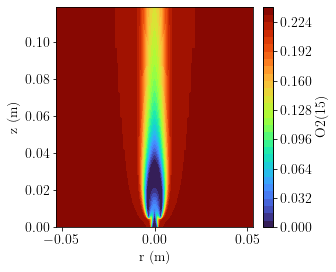

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams['text.usetex'] = True
from matplotlib import rc
rc('font',**{'family':'sansserif', 'size':14})

# Plotting utilities
def plot_contour_tri(r, z, f, mirror=False, cbar_label='', filename=''):
    '''
    
    Parameters
    ----------
    r : numpy array
        Radial coordinate.
    z : numpy array
        Axial coordinate.
    f : numpy array
        Feature to plot.
    mirror : bool, optional
        If True, it will mirror the solution. The default is False.
    cbar_label : string, optional
        The label of the colorbar. The default is ''.
    filename : string, optional
        Path to save the plot. The default is ''.

    Returns
    -------
    None.

    '''
    
    fig, ax = plt.subplots()
    levels = 32
    
    triang = tri.Triangulation(r, z)
    cs = ax.tricontourf(triang, f, levels, cmap='turbo')
                 
    if mirror:
        triang_mirror = tri.Triangulation(-r, z)
        cs = ax.tricontourf(triang_mirror, f, levels, cmap='turbo')
                 
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    ax.set_xlabel('r (m)')
    ax.set_ylabel('z (m)')
    ax.set_ylim(bottom=0)
    fig.colorbar(cs, cax=cax, format='%.2e')
    cbar = fig.colorbar(cs, cax=cax)
    cbar.set_label(cbar_label)
    fig.tight_layout()

    if filename != '':
        fig.savefig(filename, transparent=True, dpi=600, bbox_inches='tight')    
    
    plt.show()

# Path to the dataset
path = '/Users/alberto/Documents/Teaching/ERCOFTAC/DMD_Peppe'

# We read the dataset with f=10 Hz at timestep t=0 
df = pd.read_csv(f'{path}/output.0', sep='\s+')

xyz = np.array(df[['x[m](2)', 'y[m](3)', 'z[m](4)']]) # x, y, z coordinates

# We select the features that we want to analyse
features = ['T[k](11)', 'H2(12)', 'H(13)', 'O(14)', 'O2(15)', 'OH(16)', 'H2O(17)', 
            'HO2(18)', 'H2O2(19)', 'CH2(22)', 'CH3(24)', 
            'CH4(25)', 'CO(26)', 'CO2(27)', 'CH2O(29)', 
            'CH3OH(32)', 'C2H(33)', 'C2H2(34)', 'C2H3(35)', 'C2H4(36)', 
            'C2H5(37)', 'C2H6(38)', 'HCCO(39)', 'CH2CO(40)', 'N2(42)', 
            'C3H7(44)', 'C3H8(45)', 'CH2CHO(46)', 'CH3CHO(47)']

feature = 'O2(15)'
f = np.array(df[feature])
plot_contour_tri(xyz[:,0], xyz[:,2], f, mirror=True, cbar_label=feature)


## Performing PCA with OpenMORe

Here we do some PCA analysis

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.968476804068568

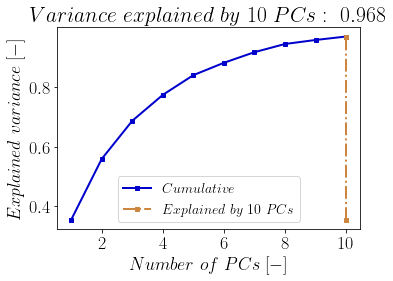

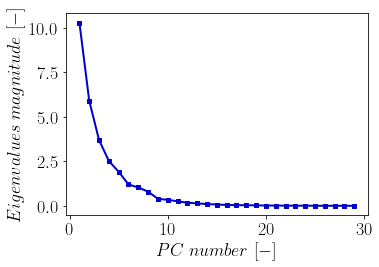

In [2]:
import OpenMORe.model_order_reduction as model_order_reduction
from OpenMORe.utilities import *

# Dictionary with the instruction for the PCA algorithm:
settings ={
    #centering and scaling options
    "center"                    : True,
    "centering_method"          : "mean",
    "scale"                     : True,
    "scaling_method"            : "auto",

    #set the final dimensionality
    "number_of_eigenvectors"    : 10,
    
    #enable to plot the cumulative explained variance
    "enable_plot_variance"      : True,
    
    #set the number of the variable whose reconstruction must be plotted
    "variable_to_plot"          : 0,

}

# We create our data matrix X
X = np.array(df[features])

# Start the dimensionality reduction and the feature extraction step:
# call the PCA class and give in input X and the dictionary with the instructions
model = model_order_reduction.PCA(X, settings)

# Perform the dimensionality reduction via Principal Component Analysis,
# and return the eigenvectors of the reduced manifold ad the PC scores
PCs = model.fit()
Z = model.get_scores()

# Assess the percentage of explained variance if the number of PCs has not
# been set automatically, and plot the result
model.get_explained()

We can check also the quality of the reconstruction using the truncated PCA matrix

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


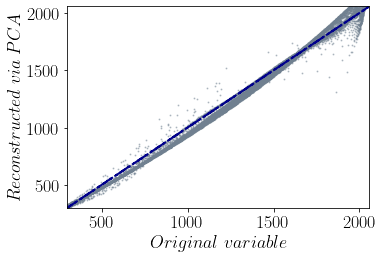

In [3]:
# Reconstruct the matrix from the reduced PCA manifold
X_recovered = model.recover()

# Compare the reconstructed chosen variable "set_num_to_plot" with the
# original one, by means of a parity plot
model.plot_parity()

We can also inspect the PCs to check which are the dominant species.